In [2]:
import pyro
import pyro.distributions as dist
import numpy as np
import scipy.stats as stats
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
# 給定一個母體
param = (1, 9) 
distribution = dist.Beta(*param)
print("母體平均數:{:.4f}, 母體標準差:{:.4f}"  \
      .format(distribution.mean, distribution.stddev))

母體平均數:0.1000, 母體標準差:0.0905


樣本平均數:0.1136, 樣本標準差:0.0993


<AxesSubplot:ylabel='Density'>

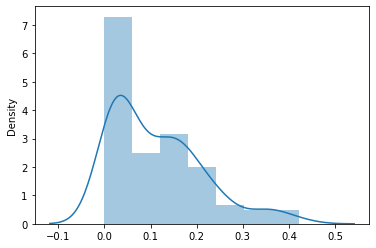

In [4]:
# 嘗試用此母體來sample出一些樣本
n = 100
samples = distribution.sample((n,))
print("樣本平均數:{:.4f}, 樣本標準差:{:.4f}"  \
      .format(samples.mean(), samples.std()))
# 嘗試畫出圖形來看分佈
sns.distplot(samples)

In [10]:
# 改變n的大小, 用此母體sample出一些樣本, 並用KS-test來檢驗是否為常態分佈
# 假定若KS-test的p-value小於0.01就視為常態分佈
# 可以從樣本平均數, 樣本數n, 和母體標準差σ估算99%信心水準的信賴區間
alpha = 0.01 # 可容忍的型一誤差
confidence_level = 1-alpha # 信賴水準99%
mu = distribution.mean.numpy() # 母體平均數
sigma = distribution.stddev.numpy() # 母體標準差
Phi_inv_z = stats.norm.ppf(1-alpha/2)
columns=["樣本數n", "樣本平均數", "樣本標準差", "KS-test p-value",  \
         "KS-test 是否為常態分佈", "信賴區間_下界", "信賴區間_上界", \
         "母體平均數是否落在信賴區間內" ]
rows = []
samples_collect = {}
for n in range(1,101):
    samples = distribution.sample((n,))
    samples_collect.update({n:samples})
    mean_sample, std_sample = samples.mean().numpy(), samples.std().numpy()
    _, p = stats.kstest(np.array(samples),"norm") 
    CI_lb = mean_sample-Phi_inv_z*sigma/np.sqrt(n)
    CI_ub = mean_sample+Phi_inv_z*sigma/np.sqrt(n)
    rows.append([n, 
                 mean_sample.round(4), 
                 std_sample.round(4), 
                 p.round(4), 
                 p<0.01,
                 CI_lb.round(4),
                 CI_ub.round(4),
                 (CI_lb<=mu)&(CI_ub>=mu)
                ])
    
df = pd.DataFrame(data=rows, columns=columns)   
df.head(10)

,樣本數n,樣本平均數,樣本標準差,KS-test p-value,KS-test 是否為常態分佈,信賴區間_下界,信賴區間_上界,母體平均數是否落在信賴區間內
0,1,0.1171,NaN,0.9068,False,-0.1159,0.3501,True
1,2,0.0620,0.0668,0.4883,False,-0.1027,0.2268,True
2,3,0.1063,0.0497,0.2855,False,-0.0282,0.2408,True
3,4,0.1130,0.0961,0.1857,False,-0.0034,0.2295,True
4,5,0.0568,0.0329,0.1034,False,-0.0473,0.1610,True
5,6,0.0918,0.0752,0.0641,False,-0.0034,0.1869,True
6,7,0.0727,0.0584,0.0328,False,-0.0153,0.1608,True
7,8,0.1033,0.1047,0.0225,False,0.0210,0.1857,True
8,9,0.0951,0.0968,0.0132,False,0.0175,0.1728,True
9,10,0.0608,0.0564,0.0071,True,-0.0129,0.1345,True


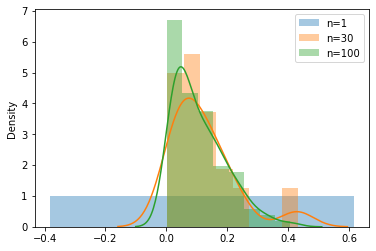

In [11]:
# 嘗試畫出圖形來看分佈
for n in [1,30,100]:
    samples = samples_collect[n]
    sns.distplot(samples, label="n="+str(n))
plt.legend()
plt.show()